In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df= df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
160,32,100000,1
211,52,150000,1
301,48,74000,1
120,36,75000,0
269,40,61000,0


# Train test split


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased', axis =1),df['Purchased'],test_size=0.3,random_state=0)

In [8]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the Train set, it will learn the perameters
scaler.fit(X_train)

# Transform train and test sets

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [12]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [101]:
# Here mean and std is not 0 and 1
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [103]:
#After standardization the mean is 0 and std is 1.
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of scaling

<function matplotlib.pyplot.show(close=None, block=None)>

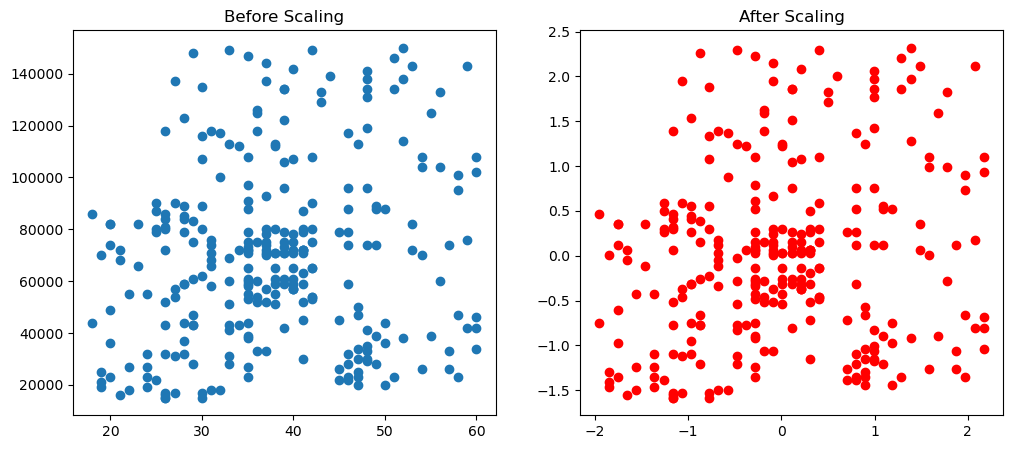

In [15]:
fig, (ax1,ax2) = plt.subplots(ncols =2, figsize = (12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title("After Scaling")
plt.show

So, as you can see there is no changes in datapoints but the scale values of x-axis and y-axis has been changed

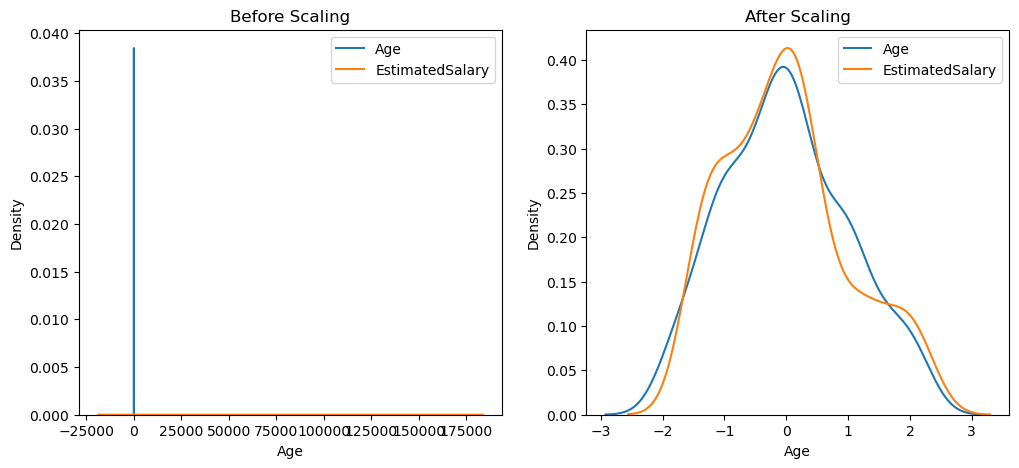

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols =2, figsize = (12,5))

# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax = ax1,label = "Age")
sns.kdeplot(X_train['EstimatedSalary'],label = "EstimatedSalary", ax= ax1)
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],label = "Age" ,ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],label = "EstimatedSalary", ax = ax2)
ax2.legend()
plt.show()

# Comparison of Distribution

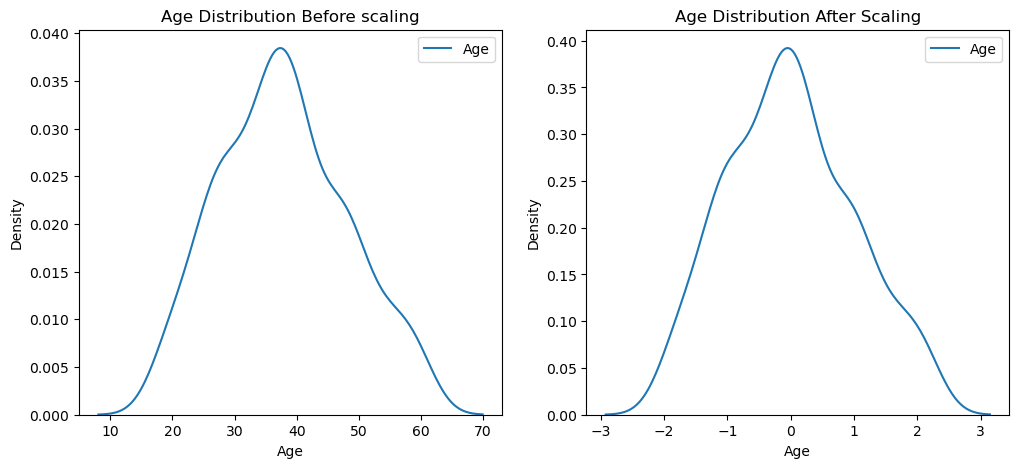

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols =2, figsize = (12,5))

# Before Scaling
ax1.set_title('Age Distribution Before scaling')
sns.kdeplot(X_train['Age'],label = 'Age' ,ax= ax1)
ax1.legend()


# after Scaling
ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled["Age"],label = 'Age', ax= ax2)
ax2.legend()
plt.show()

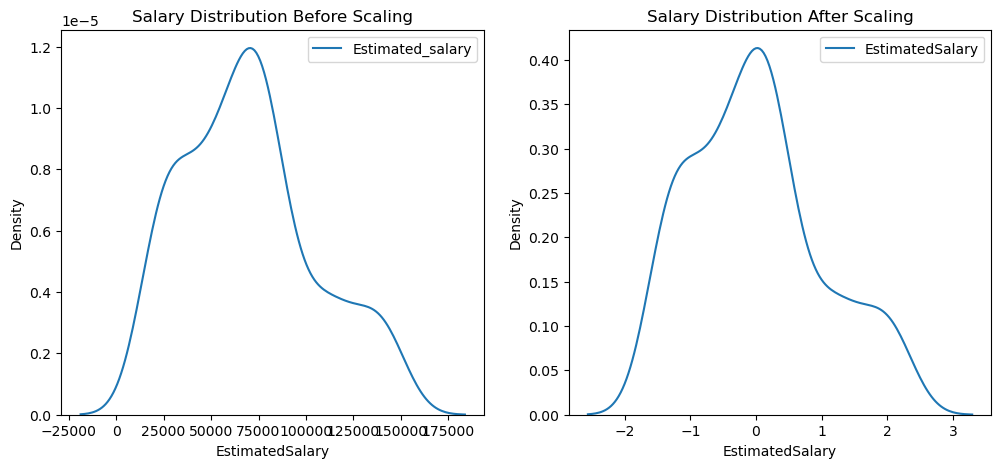

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols= 2, figsize =(12,5))

#before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'],label = "Estimated_salary",ax=ax1)
ax1.legend()

# After Scaling
ax2.set_title("Salary Distribution After Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax= ax2, label = "EstimatedSalary")
ax2.legend()
plt.show()

# Why Scaling is important

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
# makin lr model on unscaled values 
lr = LogisticRegression()
# making lr model on scaled values
lr_scaled = LogisticRegression()

In [150]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [151]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [152]:
from sklearn.metrics import accuracy_score

In [153]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))
# may be the new version or the updated version of LR model do better prediction on unscaled sets

Actual 0.875
Scaled 0.8666666666666667


In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [156]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [161]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [162]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
